# Comparação de métodos de redução de dimensão

* Aluno: Marcos Paulo de Carvalho Lopes

* Descrição: Realizar uma comparação dos métodos PCA, LDA, e t-SNE no dataset CIFAR 10 

In [ ]:
# Importando

import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
palette = sns.color_palette("bright", 10)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using TensorFlow backend.


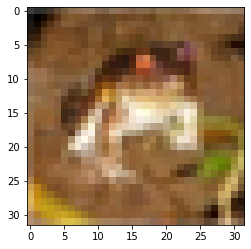

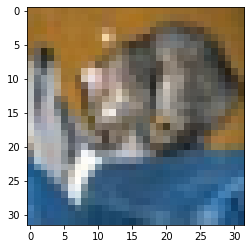

(50000, 32, 32, 3)
(50000, 3072)


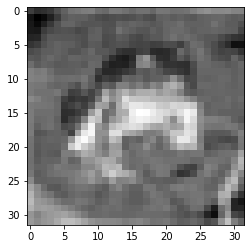

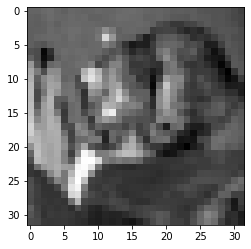

(50000, 32, 32)
(50000, 1024)


In [ ]:
# Carregando os dados

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

# Instânciando os dados do cifar10 coloridos sem normalização

(x_train_color, y_train_color), (x_test_color, y_test_color) = cifar10.load_data()

plt.imshow(x_train_color[0])
plt.show()
plt.imshow(x_test_color[0])
plt.show()
print(x_train_color.shape)

x_train_color = x_train_color.reshape(50000,3072)
x_test_color = x_test_color.reshape(10000,3072)
y_train_color = y_train_color.reshape(50000)
y_test_color = y_test_color.reshape(10000)

print(x_train_color.shape)

#Instânciando os dados do cifar10 coloridos com normalização

std_x_train_color = x_train_color
std_x_test_color = x_test_color
mm_x_train_color = x_train_color
mm_x_test_color = x_test_color

mm = MinMaxScaler()
mm.fit(mm_x_train_color)

mm_x_train_color = mm.transform(mm_x_train_color)
mm_x_test_color = mm.transform(mm_x_test_color)

std = StandardScaler()
std.fit(std_x_train_color)

std_x_train_color = std.transform(std_x_train_color)
std_x_test_color = std.transform(std_x_test_color)

# Instânciando os dados do cifar10 em escala de cinza sem normalização

rgb_weights = [0.2989, 0.5870, 0.1140]

(x_train_gray, y_train_gray), (x_test_gray, y_test_gray) = cifar10.load_data()

x_train_gray_ok = []
x_test_gray_ok = []

for i in range(len(x_train_gray)):

  grayscale_image = np.dot(x_train_gray[i], rgb_weights)

  x_train_gray_ok.append(grayscale_image)

for i in range(len(x_test_gray)):

  grayscale_image = np.dot(x_test_gray[i], rgb_weights)

  x_test_gray_ok.append(grayscale_image)

x_train_gray_ok = np.array(x_train_gray_ok)
x_test_gray_ok = np.array(x_test_gray_ok)

plt.imshow(x_train_gray_ok[0], cmap = plt.get_cmap("gray"))
plt.show()
plt.imshow(x_test_gray_ok[0], cmap = plt.get_cmap("gray"))
plt.show()
print(x_train_gray_ok.shape)

x_train_gray_ok = x_train_gray_ok.reshape(50000,1024)
x_test_gray_ok = x_test_gray_ok.reshape(10000,1024)
print(x_train_gray_ok.shape)

# Instânciando os dados do cifar10 em escala de cinza com normalização

std_x_train_gray = x_train_gray_ok
std_x_test_gray = x_test_gray_ok
mm_x_train_gray = x_train_gray_ok
mm_x_test_gray = x_test_gray_ok

mm = MinMaxScaler()
mm.fit(mm_x_train_gray)

mm_x_train_gray = mm.transform(mm_x_train_gray)
mm_x_test_gray = mm.transform(mm_x_test_gray)

std = StandardScaler()
std.fit(std_x_train_gray)

std_x_train_gray = std.transform(std_x_train_gray)
std_x_test_gray = std.transform(std_x_test_gray)


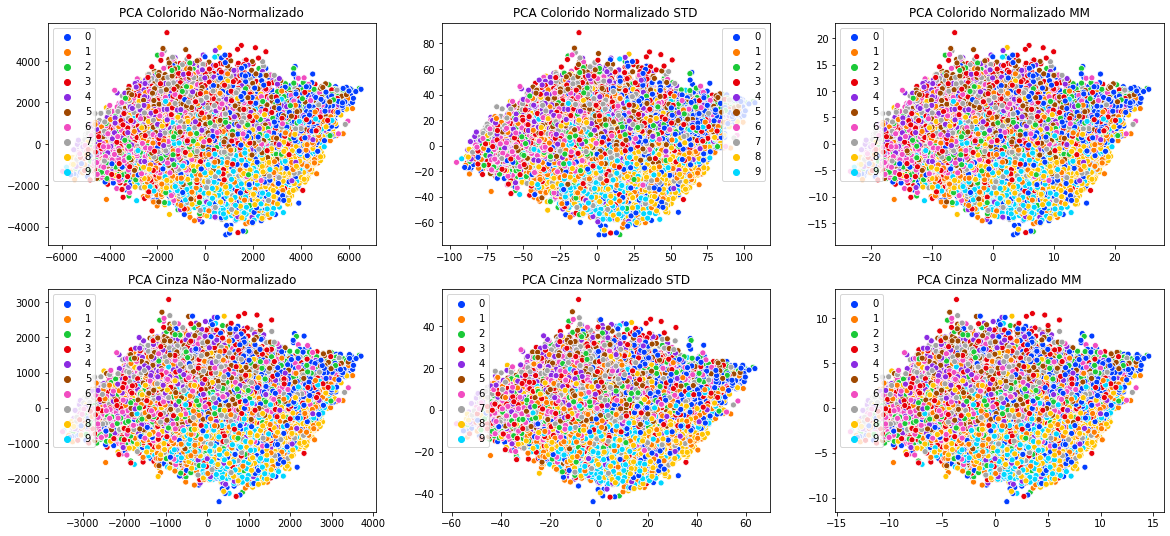

In [ ]:
# Redimensão e visualização dos dados com PCA

n_components = 2

## PCA

pca = PCA(n_components=n_components)

### Coloridos

#### Normalizado

std_x_embedded_pca = pca.fit_transform(std_x_train_color)
mm_x_embedded_pca = pca.fit_transform(mm_x_train_color)

#### Não - Normalizado

x_embedded_pca = pca.fit_transform(x_train_color)

### Cinza

#### Normalizado

std_x_embedded_pca_gray = pca.fit_transform(std_x_train_gray)
mm_x_embedded_pca_gray = pca.fit_transform(mm_x_train_gray)

#### Não - Normalizado

x_embedded_pca_gray = pca.fit_transform(x_train_gray_ok)

# Visualização

plt.figure(figsize=(20,9))
plt.subplot(2,3,1)
plt.title('PCA Colorido Não-Normalizado')
sns.scatterplot(x_embedded_pca[:,0], x_embedded_pca[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,2)
plt.title('PCA Colorido Normalizado STD')
sns.scatterplot(std_x_embedded_pca[:,0], std_x_embedded_pca[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,3)
plt.title('PCA Colorido Normalizado MM')
sns.scatterplot(mm_x_embedded_pca[:,0], mm_x_embedded_pca[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,4)
plt.title('PCA Cinza Não-Normalizado')
sns.scatterplot(x_embedded_pca_gray[:,0], x_embedded_pca_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,5)
plt.title('PCA Cinza Normalizado STD')
sns.scatterplot(std_x_embedded_pca_gray[:,0], std_x_embedded_pca_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,6)
plt.title('PCA Cinza Normalizado MM')
sns.scatterplot(mm_x_embedded_pca_gray[:,0], mm_x_embedded_pca_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.show()


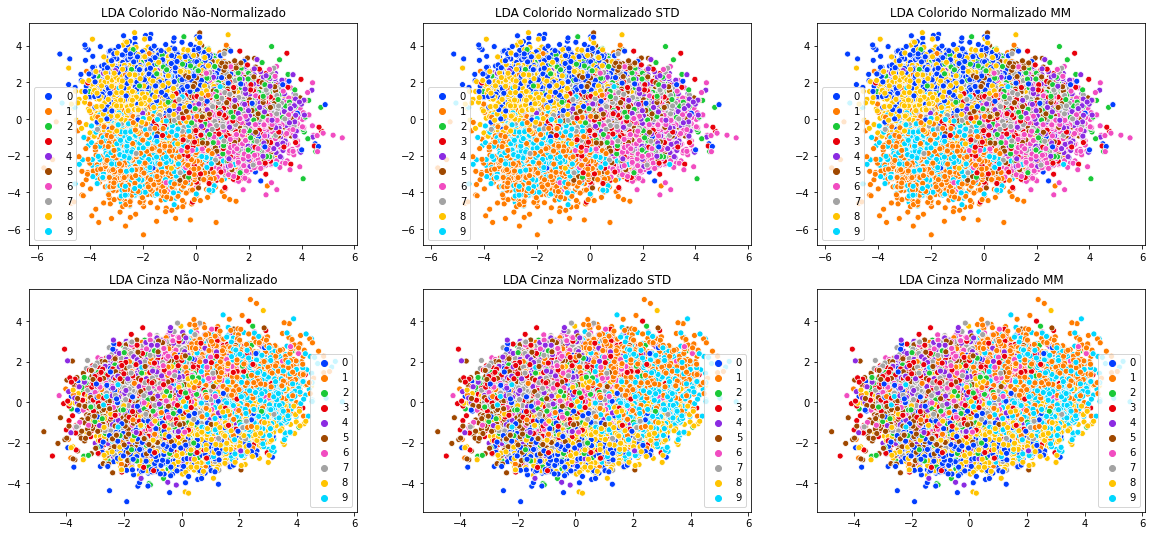

In [ ]:
## Redimensão e visualização dos dados com LDA

n_components = 2

## LDA

lda = LDA(n_components=n_components)

### Coloridos

#### Normalizado

std_x_embedded_lda = lda.fit(std_x_train_color,y_train_color).transform(std_x_train_color)
mm_x_embedded_lda = lda.fit(mm_x_train_color,y_train_color).transform(mm_x_train_color)

#### Não - Normalizado

x_embedded_lda = lda.fit(x_train_color,y_train_color).transform(x_train_color)

### Cinza

#### Normalizado

std_x_embedded_lda_gray = lda.fit(std_x_train_gray,y_train_color).transform(std_x_train_gray)
mm_x_embedded_lda_gray = lda.fit(mm_x_train_gray,y_train_color).transform(mm_x_train_gray)

#### Não - Normalizado

x_embedded_lda_gray = lda.fit(x_train_gray_ok,y_train_color).transform(x_train_gray_ok)

# Visualização

plt.figure(figsize=(20,9))
plt.subplot(2,3,1)
plt.title('LDA Colorido Não-Normalizado')
sns.scatterplot(x_embedded_lda[:,0], x_embedded_lda[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,2)
plt.title('LDA Colorido Normalizado STD')
sns.scatterplot(std_x_embedded_lda[:,0], std_x_embedded_lda[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,3)
plt.title('LDA Colorido Normalizado MM')
sns.scatterplot(mm_x_embedded_lda[:,0], mm_x_embedded_lda[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,4)
plt.title('LDA Cinza Não-Normalizado')
sns.scatterplot(x_embedded_lda_gray[:,0], x_embedded_lda_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,5)
plt.title('LDA Cinza Normalizado STD')
sns.scatterplot(std_x_embedded_lda_gray[:,0], std_x_embedded_lda_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,6)
plt.title('LDA Cinza Normalizado MM')
sns.scatterplot(mm_x_embedded_lda_gray[:,0], mm_x_embedded_lda_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.show()

In [ ]:
## Redimensão e visualização dos dados com TSNE

n_components = 2
perplexity = 32


pca = PCA(n_components=50)

## TSNE

tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42,n_jobs=-1,learning_rate=50.0)

### Coloridos

#### Normalizado

std_x_embedded_tsne = pca.fit_transform(std_x_train_color)
std_x_embedded_tsne = tsne.fit_transform(std_x_embedded_tsne)
mm_x_embedded_tsne = pca.fit_transform(mm_x_train_color)
mm_x_embedded_tsne = tsne.fit_transform(mm_x_embedded_tsne)

#### Não - Normalizado

x_embedded_tsne = pca.fit_transform(x_train_color)
x_embedded_tsne = tsne.fit_transform(x_embedded_tsne)

### Cinza

#### Normalizado

std_x_embedded_tsne_gray = pca.fit_transform(std_x_train_gray)
std_x_embedded_tsne_gray = tsne.fit_transform(std_x_embedded_tsne_gray)
mm_x_embedded_tsne_gray = pca.fit_transform(mm_x_train_gray)
mm_x_embedded_tsne_gray = tsne.fit_transform(mm_x_embedded_tsne_gray)


#### Não - Normalizado

x_embedded_tsne_gray = pca.fit_transform(x_train_gray_ok)
x_embedded_tsne_gray = tsne.fit_transform(x_embedded_tsne_gray)

# Visualização

plt.figure(figsize=(20,9))
plt.subplot(2,3,1)
plt.title('TSNE Colorido Não-Normalizado')
sns.scatterplot(x_embedded_tsne[:,0], x_embedded_tsne[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,2)
plt.title('TSNE Colorido Normalizado STD')
sns.scatterplot(std_x_embedded_tsne[:,0], std_x_embedded_tsne[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,3)
plt.title('TSNE Colorido Normalizado MM')
sns.scatterplot(mm_x_embedded_tsne[:,0], mm_x_embedded_tsne[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,4)
plt.title('TSNE Cinza Não-Normalizado')
sns.scatterplot(x_embedded_tsne_gray[:,0], x_embedded_tsne_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,5)
plt.title('TSNE Cinza Normalizado STD')
sns.scatterplot(std_x_embedded_tsne_gray[:,0], std_x_embedded_tsne_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.subplot(2,3,6)
plt.title('TSNE Cinza Normalizado MM')
sns.scatterplot(mm_x_embedded_tsne_gray[:,0], mm_x_embedded_tsne_gray[:,1], hue=y_train_color, legend='full', palette=palette)
plt.show()



KeyboardInterrupt: ignored

Acuracia Colorido Normalizado STD para 10 componentes: 0.3481
Acuracia Colorido Normalizado MM para 10 componentes: 0.3476
Acuracia Colorido Não Normalizado para 10 componentes: 0.3484
Acuracia Cinza Normalizado STD para 10 componentes: 0.3194
Acuracia Cinza Normalizado MM para 10 componentes: 0.3104
Acuracia Cinza Não Normalizado para 10 componentes: 0.3249
Acuracia Colorido Normalizado STD para 20 componentes: 0.3865
Acuracia Colorido Normalizado MM para 20 componentes: 0.388
Acuracia Colorido Não Normalizado para 20 componentes: 0.3906
Acuracia Cinza Normalizado STD para 20 componentes: 0.3377
Acuracia Cinza Normalizado MM para 20 componentes: 0.3318
Acuracia Cinza Não Normalizado para 20 componentes: 0.3388
Acuracia Colorido Normalizado STD para 30 componentes: 0.3932
Acuracia Colorido Normalizado MM para 30 componentes: 0.3926
Acuracia Colorido Não Normalizado para 30 componentes: 0.3992
Acuracia Cinza Normalizado STD para 30 componentes: 0.3384
Acuracia Cinza Normalizado MM para 

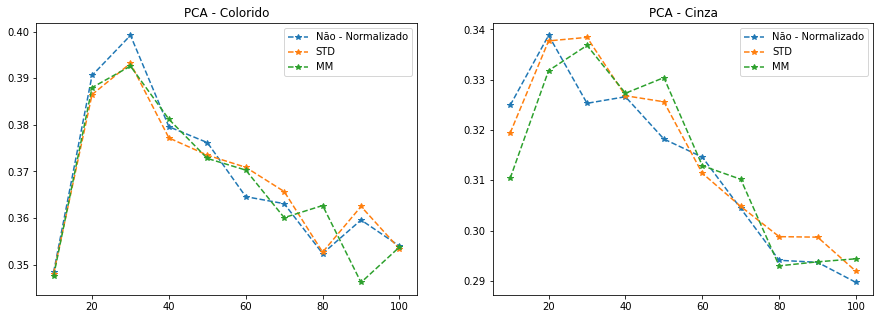

1. feature 1 (0.049909)
2. feature 0 (0.049732)
3. feature 2 (0.046757)
4. feature 8 (0.042713)
5. feature 4 (0.042601)
6. feature 24 (0.038431)
7. feature 16 (0.037989)
8. feature 6 (0.037082)
9. feature 5 (0.036933)
10. feature 3 (0.035697)
11. feature 17 (0.035068)
12. feature 18 (0.034068)
13. feature 10 (0.032431)
14. feature 13 (0.031612)
15. feature 11 (0.031126)
16. feature 12 (0.030419)
17. feature 15 (0.030209)
18. feature 7 (0.029544)
19. feature 22 (0.029177)
20. feature 23 (0.028563)
21. feature 20 (0.028100)
22. feature 25 (0.027563)
23. feature 26 (0.027473)
24. feature 28 (0.027300)
25. feature 14 (0.026936)
26. feature 19 (0.026704)
27. feature 9 (0.026695)
28. feature 21 (0.026680)
29. feature 29 (0.026396)
30. feature 27 (0.026092)


In [ ]:
# Classificação do espaço do PCA

rf_clf = RandomForestClassifier(n_estimators=15) # 200 melhor resultado (+-50%) / +-30 min pra rodar 

comp = [10,20,30,40,50,60,70,80,90,100]
acc_C_N = []
acc_C_STD = []
acc_C_MM = []
acc_Ci_N = []
acc_Ci_STD = []
acc_Ci_MM = []


for i in comp:

  pca = PCA(n_components=i)

  ## PCA

  ### Coloridos

  #### Normalizado
  
  std_x_embedded_pca = pca.fit(std_x_train_color)
  rf_clf.fit(std_x_embedded_pca.transform(std_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_pca.transform(std_x_test_color))
  acc_C_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_pca = pca.fit(mm_x_train_color)
  rf_clf.fit(mm_x_embedded_pca.transform(mm_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_pca.transform(mm_x_test_color))
  acc_C_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_pca = pca.fit(x_train_color)
  rf_clf.fit(x_embedded_pca.transform(x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_pca.transform(x_test_color))
  acc_C_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  ### Cinza

  #### Normalizado

  std_x_embedded_pca_gray = pca.fit(std_x_train_gray)
  rf_clf.fit(std_x_embedded_pca_gray.transform(std_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_pca_gray.transform(std_x_test_gray))
  acc_Ci_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_pca_gray = pca.fit(mm_x_train_gray)
  rf_clf.fit(mm_x_embedded_pca_gray.transform(mm_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_pca_gray.transform(mm_x_test_gray))
  acc_Ci_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_pca_gray = pca.fit(x_train_gray_ok)
  rf_clf.fit(x_embedded_pca_gray.transform(x_train_gray_ok), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_pca_gray.transform(x_test_gray_ok))
  acc_Ci_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

# Gráfico de variação de componentes

comp = np.array(comp)
acc_C_N = np.array(acc_C_N)
acc_C_STD = np.array(acc_C_STD)
acc_C_MM = np.array(acc_C_MM)
acc_Ci_N = np.array(acc_Ci_N)
acc_Ci_STD = np.array(acc_Ci_STD)
acc_Ci_MM = np.array(acc_Ci_MM)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.title('PCA - Colorido')
l1, = plt.plot(comp, acc_C_N, '--*') 
l2, = plt.plot(comp, acc_C_STD, '--*')
l3, = plt.plot(comp, acc_C_MM, '--*')
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])

plt.subplot(1,2,2)
plt.title('PCA - Cinza')
l1, = plt.plot(comp, acc_Ci_N, '--*') 
l2, = plt.plot(comp, acc_Ci_STD, '--*') 
l3, = plt.plot(comp, acc_Ci_MM, '--*') 
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])
plt.show()

# Gráfico do melhor resultado / importância de features - PCA Colorido 30 componentes não-normalizado

print("Melhores features:")
pca = PCA(n_components=30)
x_embedded_pca = pca.fit(x_train_color)
rf_clf.fit(x_embedded_pca.transform(x_train_color), y_train_color)
y_pred_rf = rf_clf.predict(x_embedded_pca.transform(x_test_color))

importances = rf_clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],axis=0)

indices = np.argsort(importances)[::-1]
for f in range(x_embedded_pca.transform(x_train_color).shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



In [ ]:
# Classificação do espaço do LDA

rf_clf = RandomForestClassifier(n_estimators=15) # 200 melhor resultado (+-50%) / +-50 min pra rodar 

comp = [2,3,4,5,6,7,8,9]
acc_C_N = []
acc_C_STD = []
acc_C_MM = []
acc_Ci_N = []
acc_Ci_STD = []
acc_Ci_MM = []


for i in comp:

  lda = LDA(n_components=i)

  ## LDA

  ### Coloridos

  #### Normalizado
  
  std_x_embedded_lda = lda.fit(std_x_train_color,y_train_color)
  rf_clf.fit(std_x_embedded_lda.transform(std_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_lda.transform(std_x_test_color))
  acc_C_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_lda = lda.fit(mm_x_train_color,y_train_color)
  rf_clf.fit(mm_x_embedded_lda.transform(mm_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_lda.transform(mm_x_test_color))
  acc_C_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_lda = lda.fit(x_train_color,y_train_color)
  rf_clf.fit(x_embedded_lda.transform(x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_lda.transform(x_test_color))
  acc_C_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  ### Cinza

  #### Normalizado

  std_x_embedded_lda_gray = lda.fit(std_x_train_gray,y_train_color)
  rf_clf.fit(std_x_embedded_lda_gray.transform(std_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_lda_gray.transform(std_x_test_gray))
  acc_Ci_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_lda_gray = lda.fit(mm_x_train_gray,y_train_color)
  rf_clf.fit(mm_x_embedded_lda_gray.transform(mm_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_lda_gray.transform(mm_x_test_gray))
  acc_Ci_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_lda_gray = lda.fit(x_train_gray_ok,y_train_color)
  rf_clf.fit(x_embedded_lda_gray.transform(x_train_gray_ok), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_lda_gray.transform(x_test_gray_ok))
  acc_Ci_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

# Gráfico de variação de componentes

comp = np.array(comp)
acc_C_N = np.array(acc_C_N)
acc_C_STD = np.array(acc_C_STD)
acc_C_MM = np.array(acc_C_MM)
acc_Ci_N = np.array(acc_Ci_N)
acc_Ci_STD = np.array(acc_Ci_STD)
acc_Ci_MM = np.array(acc_Ci_MM)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.title('LDA - Colorido')
l1, = plt.plot(comp, acc_C_N, '--*') 
l2, = plt.plot(comp, acc_C_STD, '--*')
l3, = plt.plot(comp, acc_C_MM, '--*')
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])

plt.subplot(1,2,2)
plt.title('LDA - Cinza')
l1, = plt.plot(comp, acc_Ci_N, '--*') 
l2, = plt.plot(comp, acc_Ci_STD, '--*') 
l3, = plt.plot(comp, acc_Ci_MM, '--*') 
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])
plt.show()

# Gráfico do melhor resultado / importância de features - LDA Colorido 9 componentes não-normalizado

print("Melhores features:")
lda = LDA(n_components=9)
x_embedded_lda = lda.fit(x_train_color,y_train_color)
rf_clf.fit(x_embedded_lda.transform(x_train_color), y_train_color)
y_pred_rf = rf_clf.predict(x_embedded_lda.transform(x_test_color))

importances = rf_clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],axis=0)

indices = np.argsort(importances)[::-1]
for f in range(x_embedded_lda.transform(x_train_color).shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

KeyboardInterrupt: ignored

In [ ]:
# Classificação do espaço do TSNE

rf_clf = RandomForestClassifier(n_estimators=15) # 200 melhor resultado 

comp = [1,2,3]
acc_C_N = []
acc_C_STD = []
acc_C_MM = []
acc_Ci_N = []
acc_Ci_STD = []
acc_Ci_MM = []
pca = PCA(n_components=50)

for i in comp:

  tsne = TSNE(n_components=i, perplexity=perplexity, random_state=42)

  ## TSNE

  ### Coloridos

  #### Normalizado
  
  std_x_embedded_tsne = pca.fit_transform(std_x_train_color)
  std_x_embedded_tsne = tsne.fit(std_x_embedded_tsne)
  rf_clf.fit(std_x_embedded_tsne.transform(std_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_tsne.transform(std_x_test_color))
  acc_C_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_tsne = pca.fit_transform(mm_x_train_color)
  mm_x_embedded_tsne = tsne.fit(mm_x_embedded_tsne)
  rf_clf.fit(mm_x_embedded_tsne.transform(mm_x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_tsne.transform(mm_x_test_color))
  acc_C_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_tsne = pca.fit_transform(x_train_color)
  x_embedded_tsne = tsne.fit(x_embedded_tsne)
  rf_clf.fit(x_embedded_tsne.transform(x_train_color), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_tsne.transform(x_test_color))
  acc_C_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Colorido Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  ### Cinza

  #### Normalizado

  std_x_embedded_tsne_gray = pca.fit_transform(std_x_train_gray)
  std_x_embedded_tsne_gray = tsne.fit(std_x_embedded_tsne_gray)
  rf_clf.fit(std_x_embedded_tsne_gray.transform(std_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(std_x_embedded_tsne_gray.transform(std_x_test_gray))
  acc_Ci_STD.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado STD para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  mm_x_embedded_tsne_gray = pca.fit_transform(mm_x_train_gray)
  mm_x_embedded_tsne_gray = tsne.fit(mm_x_embedded_tsne_gray)
  rf_clf.fit(mm_x_embedded_tsne_gray.transform(mm_x_train_gray), y_train_color)
  y_pred_rf = rf_clf.predict(mm_x_embedded_tsne_gray.transform(mm_x_test_gray))
  acc_Ci_MM.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Normalizado MM para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

  #### Não - Normalizado

  x_embedded_tsne_gray = pca.fit_transform(x_train_gray_ok)
  x_embedded_tsne_gray = tsne.fit(x_embedded_tsne_gray)
  rf_clf.fit(x_embedded_tsne_gray.transform(x_train_gray_ok), y_train_color)
  y_pred_rf = rf_clf.predict(x_embedded_tsne_gray.transform(x_test_gray_ok))
  acc_Ci_N.append(accuracy_score(y_test_color,y_pred_rf))

  print("Acuracia Cinza Não Normalizado para",i,"componentes:",accuracy_score(y_test_color,y_pred_rf))

# Gráfico de variação de componentes

comp = np.array(comp)
acc_C_N = np.array(acc_C_N)
acc_C_STD = np.array(acc_C_STD)
acc_C_MM = np.array(acc_C_MM)
acc_Ci_N = np.array(acc_Ci_N)
acc_Ci_STD = np.array(acc_Ci_STD)
acc_Ci_MM = np.array(acc_Ci_MM)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.title('TSNE - Colorido')
l1, = plt.plot(comp, acc_C_N, '--*') 
l2, = plt.plot(comp, acc_C_STD, '--*')
l3, = plt.plot(comp, acc_C_MM, '--*')
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])

plt.subplot(1,2,2)
plt.title('TSNE - Cinza')
l1, = plt.plot(comp, acc_Ci_N, '--*') 
l2, = plt.plot(comp, acc_Ci_STD, '--*') 
l3, = plt.plot(comp, acc_Ci_MM, '--*') 
plt.legend([l1,l2,l3],['Não - Normalizado','STD','MM'])
plt.show()

# Gráfico do melhor resultado / importância de features - TSNE Colorido 2 componentes não-normalizado

print("Melhores features:")
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
x_embedded_tsne = tsne.fit(x_train_color)
rf_clf.fit(x_embedded_tsne.transform(x_train_color), y_train_color)
y_pred_rf = rf_clf.predict(x_embedded_tsne.transform(x_test_color))

importances = rf_clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],axis=0)

indices = np.argsort(importances)[::-1]
for f in range(x_embedded_tsne.transform(x_train_color).shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

- Deve ter uma explicação de como foram tratadas as imagens durante o pré-processamento, por exemplo: foi aplicada a vetorização? Como foram tratados os canais RGB das imagens?
  - A base de dados foi previamente importada com Keras, que mantêm a naturalidade dos dados igual a disposta no site. Logo, os dados estão em uma matriz numpy de 50000x3072 de uint8s. Cada linha da matriz armazena uma imagem colorida de 32 x 32. As primeiras 1024 entradas contêm os valores do canal vermelho, as próximas 1024 o verde e as 1024 finais o azul. A imagem é armazenada na ordem principal da linha, para que as 32 primeiras entradas da matriz sejam os valores de canal vermelho da primeira linha da imagem (Citação direta).
  - As imagens também foram transformadas em escala de cinza para análise de desempenho e acuracia nos métodos de AM.
  - Feita todas as transformações, todos os dados foram divididos entre treino e teste (importação padrão usando Keras) e então foram vetorizados utilizando reshape, para ficarem prontos para métodos de normalização Standard e MinMaxScaler.

- Devem ser explicadas as informações que cada método consegue extrair (features que mais se relacionam entre se e o que representam).
  - Cada método tenta reunir os pixels de classes semelhantes que mais se destacam em cada imagem da determinada classe. Em imagens coloridos, as cores mais vibrantes, que são as que mais destacam uma classe, geralmente viram componentes interessantes. Em escala de cinza, o meio da imagem se torna mais interessantes pelo padrão da imagem, que destacam melhor uma classe mas não tanto quanto a colorida, como pode-se observar nos resultados.

- Devem ser avaliadas várias combinações de parâmetros. Tirar conclusões.
  - A variação de parâmetros seguiu o padrão apresentado na aula, em que a partir de um determinado momento aumentando os componentes o restulado começa a piora. Com o aumento das componentes, após 20, 30 e 40 componentes (melhores resultados), os métodos de redimensão começam a inserir features não tão interessantes, diminuindo a acuracia do modelo.
  - Esses resultados de componentes foram achados na prática, analisando a melhor acuracia / aumento do componente, mas também podem ser visto analisando a variância dos componentes, que era bem próxima a original e relevante na casa dos 20, 30 e 40.
  - LDA alcançou um resultado semelhante ao PCA com um número BEM menor de componentes. LDA possui uma limitação do número de componentes (igual ao número de classes) e pelos resultados quanto maior melhor.

- Mostrar a importância dos pixels das imagens para cada classe usando os métodos PCA e LDA (plotar como imagens).

  - Para o método PCA, fica muito dificil indicar quais pixeis geometricamente são mais importante para formação dos componentes, visto que a reorganização sobrepoe muitos pixels de classe diferentes, explicando a acurácia mediana dos métodos, mas analisando as imagens, vemos que as cores mais próximas do limite do RGB (muito vibrantes) são as que mais diferenciam as classes. Em LDA, temos a sobreposição de algumas classes parecidas como 5, 4 e 7, mas temos algo mais parecido com um "cluster". Imagens dispostas na primeira celula.

- Avaliar a melhor combinação de parâmetros utilizando um classificador. Tem liberdade de escolher o classificador.
  - O Classificador escolhido foi o RandomForest (rf), pois além de ser um método eficaz para a natureza dos dados, RF possui um método de análise de features que ajudaram a dizer qual a melhor combinação de componentes e onde estariam dispostos os pixels combinados. Foram feitas variações do parâmetro n_iterators, alcançado seu melhor resultado (em tempo hábil) com n_iterators = 200, mas foi deixado 15 iterators por padrão para rodar mais rápido. Além disso, a profundidade da árvore também foi levada em questão, mas como as variações não geraram resultados significativos preferiu-se manter o default.
  - Outros classificadores como GuassianNB e KNN foram levados em consideração, RandomForest obteve o melhor resultado dos três. Esperado já que a distribuição dos dados no KNN não favorece e as features não são tão boas assim pro NB (LDA e PCA).
- Testar os métodos com normalização e min-max scaler.
  - Assim que os dados foram importados e vetorizados utilizou-se a normalização do StandardScaler e MinMaxScaler. Os resultados se mostraram bastante parelhos e salvas vezes quando a normalização, tanto Std quanto MinMax, piorava a distribuição dos métodos. 